In [2]:
import sys
sys.path.append('..')
from utils.visualization import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
%load_ext autoreload
%autoreload 2

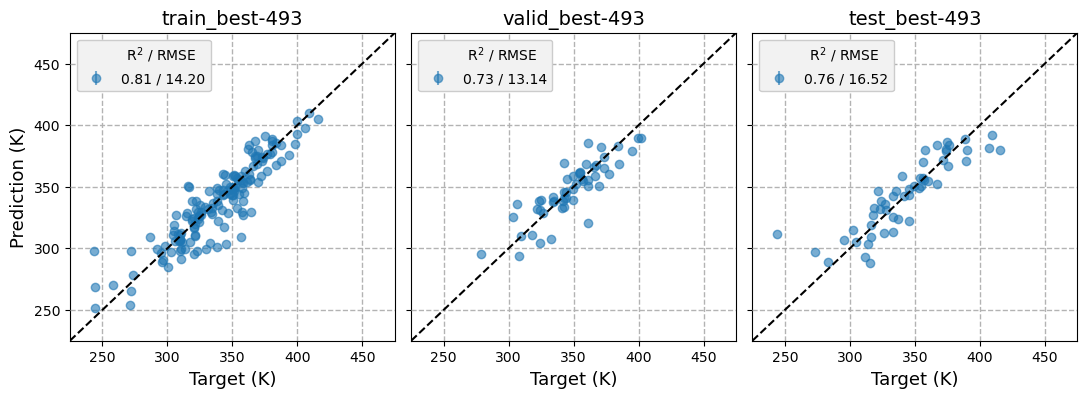

In [112]:
root = '/home/jhyang/WORKSPACES/MODELS/fpoly/tg_r15324'

f, axs = plt.subplots(1,3,figsize=(13,4))
dataset = ['train','valid','test']
data = 'best'
#data = '01000'
for i, ax in enumerate(axs.reshape(-1)):
    #d = read_data(f'/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/s/{i:02d}/result.test.pickle')
#    path = os.path.join(root, 'finetune/ssib/ALL/stack_transformer_r300_a030_01')
    path = os.path.join(root, 'finetune/cat/ALL/add_transformer_r300_a000_00')
#    path = os.path.join(root, 'finetune/ssib/ALL/add_cg_r100_a000_00')

#    path = os.path.join(root, 'scratch/graph/add_cg_00')
#    path = os.path.join(root, 'scratch/mol/add_a000_dnn_00')
#    path = os.path.join(root, 'scratch/cat/add_a000_transformer_00')
#    path = os.path.join(root, 'scratch/xgboost')

    d = read_data(os.path.join(path, f'{data}.{dataset[i]}.pkl'), merge=False)
#    d = read_data(os.path.join(path, 'best.test.pkl'))

#    plot_scatter(ax, d, alpha=0.6, xrange=[0.75,3.75], mul=5, highlight_F=False)
    plot_scatter(ax, d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')

    if data == 'best':
        epoch_file = os.path.join(path, 'best.epoch.txt')
        epoch = '_best-'+open(epoch_file).read().strip() if os.path.isfile(epoch_file) else ''
    else:
        epoch = '_' + data
    ax.set_title(dataset[i] + epoch, fontsize=14)

    if i%3 == 0: 
        ax.set_ylabel('Prediction (K)', fontsize=13)
    else:
        ax.set_yticklabels([])
    plot_grid(ax)
    if i//3 == 0: ax.set_xlabel('Target (K)', fontsize=13)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

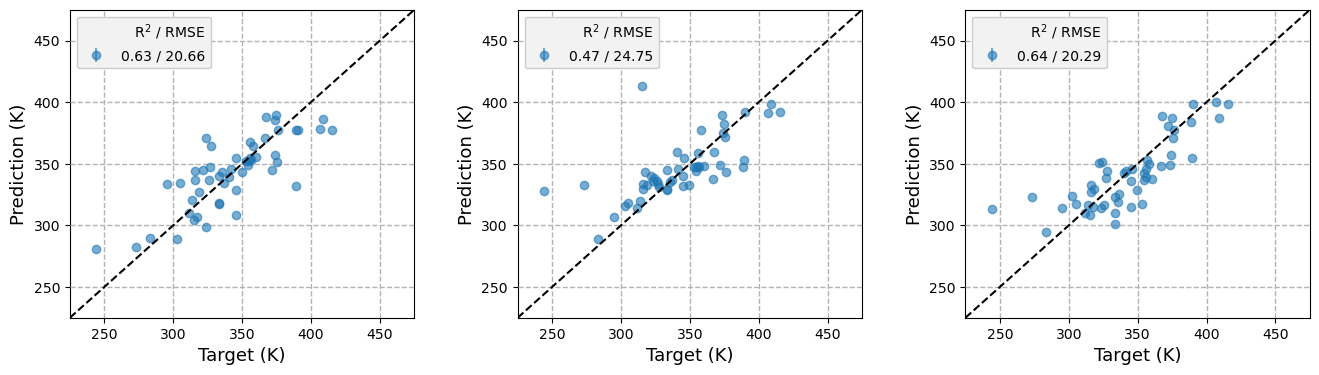

In [129]:
f, axs = plt.subplots(1,3,figsize=(16,4))

path = os.path.join(root, 'scratch/xgboost')
d = read_data(os.path.join(path, f'best.test.pkl'), merge=False)
plot_scatter(axs[0], d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')
plot_grid(axs[0])

path = os.path.join(root, 'scratch/graph/add_cg_00')
d = read_data(os.path.join(path, f'best.test.pkl'), merge=False)
plot_scatter(axs[1], d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')
plot_grid(axs[1])

path = os.path.join(root, 'scratch/mol/add_a000_dnn_00')
d = read_data(os.path.join(path, f'best.test.pkl'), merge=False)
plot_scatter(axs[2], d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')
plot_grid(axs[2])

for ax in axs:
    ax.set_ylabel('Prediction (K)', fontsize=13)
    ax.set_xlabel('Target (K)', fontsize=13)
plt.subplots_adjust(wspace=0.3)

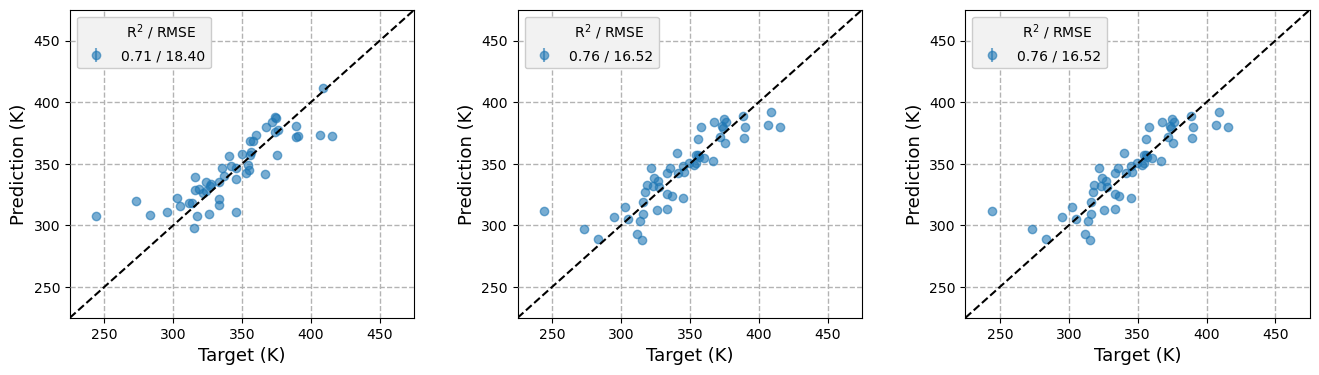

In [125]:
f, axs = plt.subplots(1,3,figsize=(16,4))
plt.subplots_adjust(wspace=0.3)

path = os.path.join(root, 'scratch/cat/add_a000_transformer_00')
d = read_data(os.path.join(path, f'best.test.pkl'), merge=False)
plot_scatter(axs[0], d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')
plot_grid(axs[0])

path = os.path.join(root, 'finetune/cat/ALL/add_transformer_r300_a000_00')
d = read_data(os.path.join(path, f'best.test.pkl'), merge=False)
plot_scatter(axs[1], d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')
plot_grid(axs[1])

path = os.path.join(root, 'finetune/cat/ALL/add_transformer_r300_a000_00')
d = read_data(os.path.join(path, f'best.test.pkl'), merge=False)
plot_scatter(axs[2], d, alpha=0.6, xrange=[225, 475], mul=5, fmt_rmse='{:5.2f}')
plot_grid(axs[2])

for ax in axs:
    ax.set_ylabel('Prediction (K)', fontsize=13)
    ax.set_xlabel('Target (K)', fontsize=13)

In [103]:

from sklearn.metrics import r2_score, mean_squared_error

mask = np.abs(d['pred'] - d['target']) < 40
print(np.sqrt(mean_squared_error(d['target'][mask], d['pred'][mask])), 
      r2_score(d['target'][mask], d['pred'][mask]),
      r2_score(d['pred'][mask], d['target'][mask], ),
      r2_score(d['target'], d['pred']))
print(d['smiles'][~mask])
print(d['target'][~mask])
print(d['pred'][~mask])
print(d['target'][~mask] - d['pred'][~mask])

18.250093 0.7100003842466159 0.586234168058075 0.6299761381969802
['FA-00226' 'FA-00461']
[ 50.6  116.11]
[98.02705  58.814514]
[-47.427048  57.295486]


In [92]:
mask = d['smiles'] == 'FA-00170'
d['target'][mask], d['prediction'][mask], 

(array([45.65], dtype=float32), array([95.7399], dtype=float32))

FileNotFoundError: [Errno 2] No such file or directory: '/home/jhyang/WORKSPACES/MODELS/fpoly/tg_r123/finetune/cat/ALL/max_transformer_r300_a000_00/best.train.pkl'

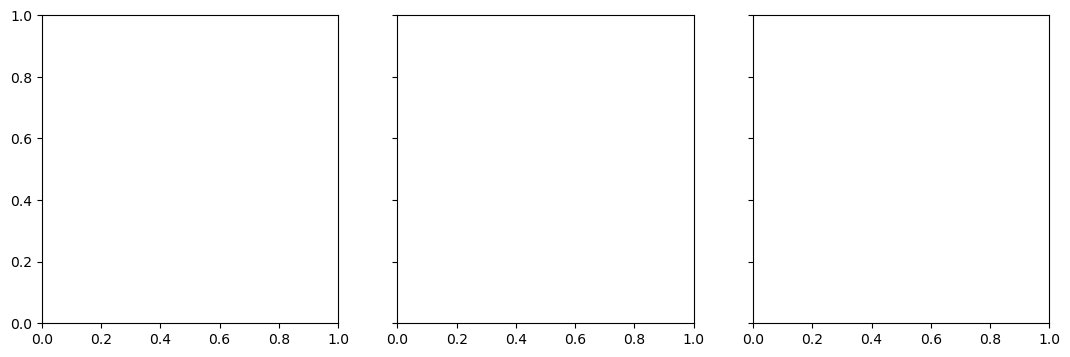

In [52]:
dataset = ['train','valid','test']

f, axs = plt.subplots(1,3,figsize=(13,4), sharex=True, sharey=True)
for i,ax in enumerate(axs.reshape(-1)):
    path = os.path.join(root, 'fpoly/tg_r123/finetune/cat/ALL/max_transformer_r300_a000_00')
#    path = os.path.join(root, 'fpoly/tg_r102/scratch/xgboost')
#    path = os.path.join(root, 'fpoly/tg_r102/scratch/cat/add_a000_transformer_00') # best 
#    path = os.path.join(root, 'fpoly/tg_r102/scratch/cat/max_a000_cg_00') # best 

    d = read_data(os.path.join(path, f'best.{dataset[i]}.pkl'), merge=False)
#    d = read_data(os.path.join(path, 'best.test.pkl'))

#    plot_scatter(ax, d, alpha=0.6, xrange=[0.75,3.75], mul=5, highlight_F=False)
    if i != 2:
        plot_scatter(ax, d, alpha=0.6, xrange=[-75,175], mul=5, fmt_rmse='{:5.2f}')
    else:
        d1, d2 = screen_by_mask(d, mask)
        plot_scatter(ax, d1, alpha=0.6, xrange=[-75,175], mul=5, fmt_rmse='{:5.2f}')
        plot_scatter(ax, d2, alpha=0.6, xrange=[-75,175], mul=5, fmt_rmse='{:5.2f}')

    epoch_file = os.path.join(path, 'best.epoch.txt')
    epoch = '-'+open(epoch_file).read().strip() if os.path.isfile(epoch_file) else ''
    ax.set_title(dataset[i] + epoch, fontsize=14)

    if i%3 == 0: ax.set_ylabel('Prediction', fontsize=12)
    if i//3 == 0: ax.set_xlabel('Target', fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

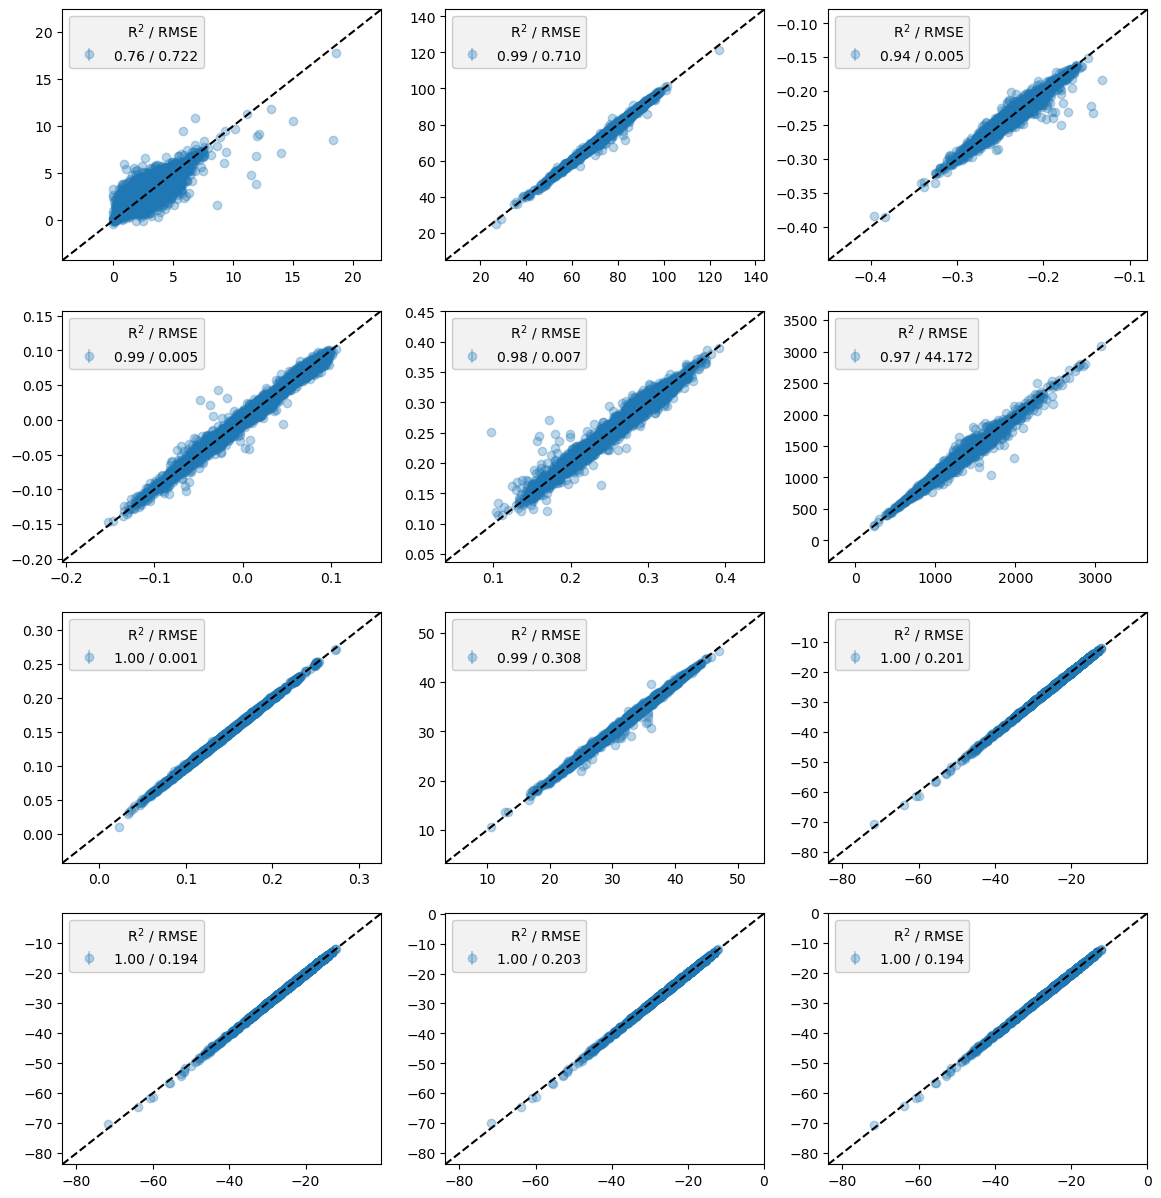

In [10]:
path = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/encoders/concat/cg_cv5_02'
f, axs = plt.subplots(4, 3, figsize=(14, 15))
ds = split_data(read_data(os.path.join(path, 'best.test.pkl')))
for ax, d in zip(axs.reshape(-1), ds):
    plot_scatter(ax, d, alpha=0.3)

In [15]:
2**13

8192

KeyError: 'var'

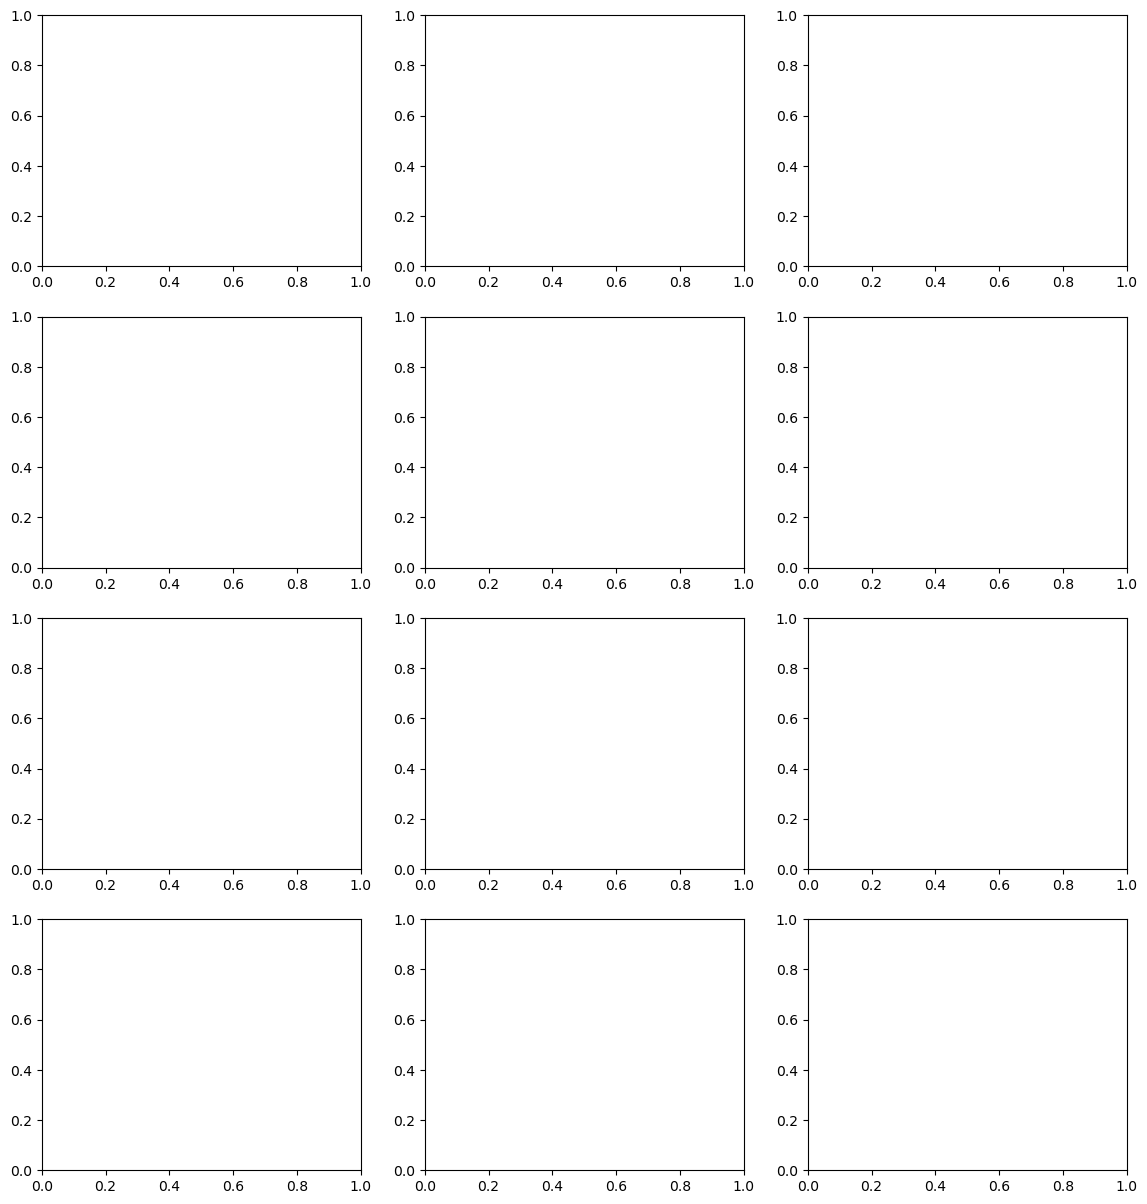

In [131]:
path = '/home/jhyang/WORKSPACES/MODELS/fpoly/encoders/ssib/V_wF_99k/transformer_f500_00'
f, axs = plt.subplots(4, 3, figsize=(14, 15))
ds = split_data(read_data(os.path.join(path, 'best.test.pickle')))
for ax, d in zip(axs.reshape(-1), ds):
    plot_scatter(ax, d, alpha=0.3)

In [150]:
#d = read_data(os.path.join(path, 'best.test.pickle'))
d['target']

array([ 2.3564999e+00,  7.1489998e+01, -2.1770000e-01, ...,
       -4.3788809e+02, -4.3788718e+02, -4.3793021e+02], dtype=float32)

In [185]:
#d = read_data('/home/jhyang/WORKSPACES/MODELS/fpoly/encoders/graph/V_wF_99k/cg_00/best.test.pickle')
#d = read_data('/home/jhyang/WORKSPACES/MODELS/fpoly/tg_r99/scratch/graph/add_cg_00/best.test.pkl')
d['target'].shape


(51, 1)

In [175]:
np.mean([t[0], t[1]], axis=0)

array([ 2.0576999e+00,  6.7889999e+01, -2.3225001e-01, -5.5000000e-03,
        2.2675000e-01,  9.0799158e+02,  1.3175049e-01,  2.6790501e+01,
       -3.7990295e+02, -3.7989575e+02, -3.7989481e+02, -3.7993463e+02],
      dtype=float32)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jhyang/WORKSPACES/MODELS/fpoly/encoders/ssib/U_wF_99k/cg_pt/best.test.pickle'

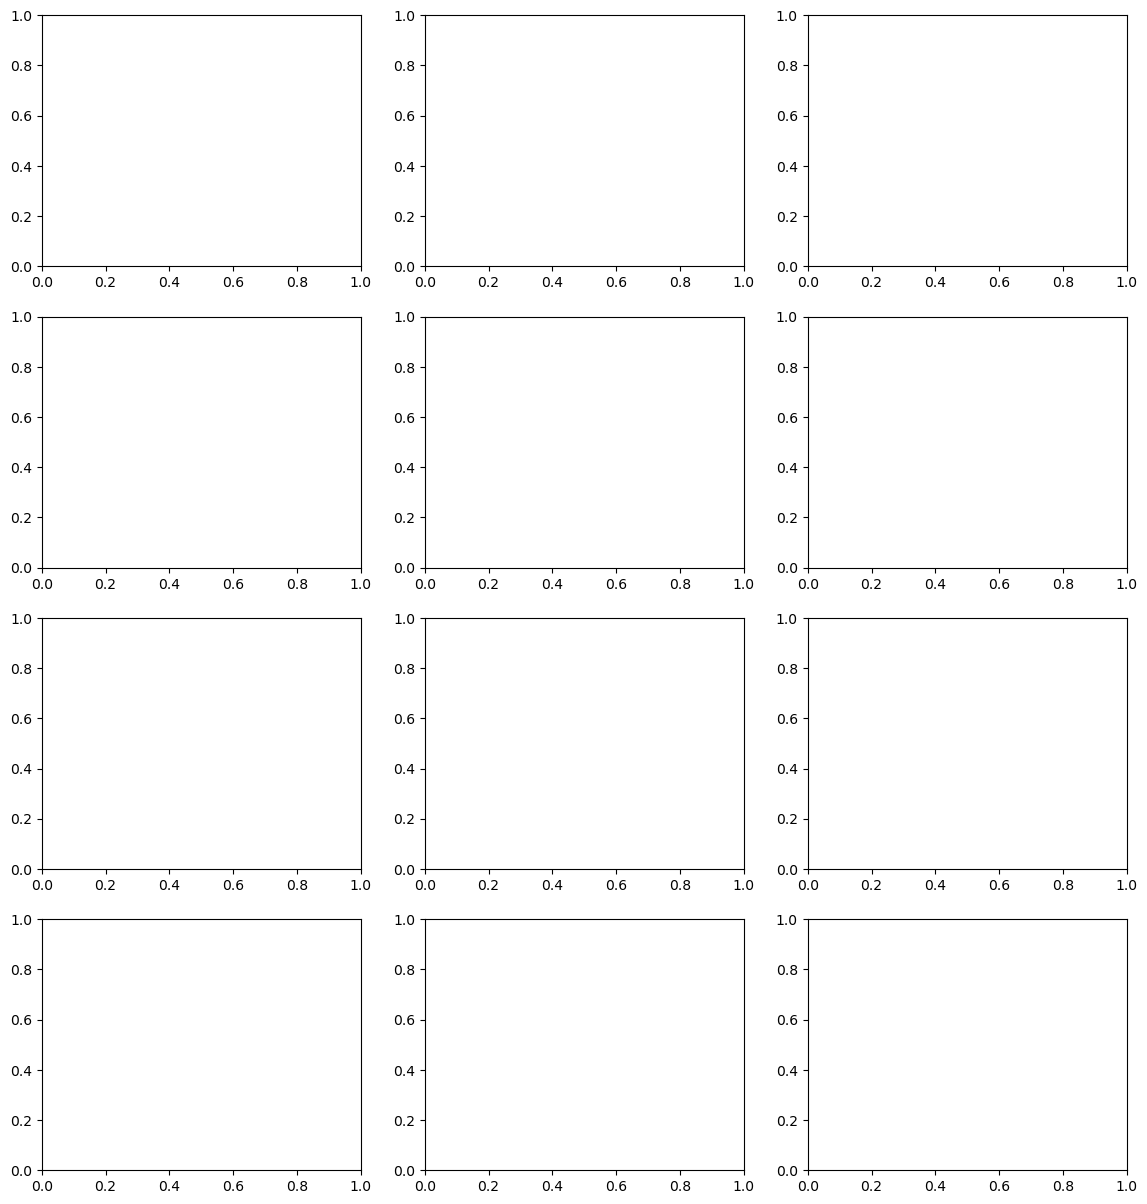

In [191]:
path = '/home/jhyang/WORKSPACES/MODELS/fpoly/encoders/ssib/U_wF_99k/cg_pt'
f, axs = plt.subplots(4, 3, figsize=(14, 15))
ds = split_data(read_data(os.path.join(path, 'best.test.pickle')))
for ax, d in zip(axs.reshape(-1), ds):
    plot_scatter(ax, d, alpha=0.5)

In [189]:
for d in ds:
    print(np.mean(np.abs(d['target'] - d['pred'])))

0.55080295
1.170034
0.0052322038
0.0053807753
0.0074850474
37.903656
0.003193247
0.5245273
4.405863
4.406186
4.4062495
4.405866


In [1]:
from ypack.utils.system import reclusive_file_search

root = '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost'


reclusive_file_search(root, 'result.test.pickle')
    

['/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/s/00/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/s/03/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/s/01/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/s/02/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/u/00/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/u/03/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/u/01/result.test.pickle',
 '/home/jhyang/WORKSPACES/MODELS/fpoly/xgboost/u/02/result.test.pickle']

In [47]:
import pandas as pd
from rdkit import Chem
import tqdm

df = pd.read_csv('/home/jhyang/WORKSPACES/DATA/polymers/QM9/qm9_origin.csv')
atoms = {}
mols  = {}
length = {}
for s in tqdm.tqdm(df.smiles.values):
    m = Chem.MolFromSmiles(s)
    eles = []
    for a in m.GetAtoms():
        n = a.GetAtomicNum()
        if n not in eles:
            eles.append(n)
        if n not in atoms:
            atoms[n] = 0
        atoms[n] += 1
    n = len(m.GetAtoms())
    if n not in length.keys():
        length[n] = 0
    length[n] += 1
    mkey = str(sorted(eles))
    if mkey not in mols:
        mols[mkey] = 0
    mols[mkey] += 1

100%|██████████| 133885/133885 [00:04<00:00, 29434.02it/s]


In [58]:
pd.concat([df.min(axis=0).to_frame().T, df.max(axis=0).to_frame().T])

,smiles,dipole_moment,isotropic_polarizability,homo,lumo,band_gap,electronic_spatial_extent,zpve,heat_capacity,internal_energy_0K,internal_energy_298K,enthalpy_298K,free_energy_298K
0,C,0.0,6.31,-0.4286,-0.175,0.0246,19.0002,0.015951,6.002,-714.568061,-714.560153,-714.559209,-714.602138
0,n1nnon1,29.5564,196.62,-0.1017,0.1935,0.6221,3374.7532,0.273944,46.969,-40.47893,-40.476062,-40.475117,-40.498597


In [34]:
import pandas as pd
import numpy as np
df = pd.read_csv('/home/jhyang/WORKSPACES/DATA/polymers/QM9/qm9_origin.csv')
smiles_q = df.smiles
df = pd.read_csv('/home/jhyang/WORKSPACES/DATA/polymers/f-polymer/Fea_Gene_20220603_DieEC_Total.csv')
df = df[np.sum(df.values == 'Did not work', axis=1) == 0]
smiles_f = set(df.loc[:,[f'Monomer_{x}' for x in 'ABCDE']].values.reshape(-1))

In [35]:
from rdkit import Chem
for s in smiles_f:
    m = Chem.MolFromSmiles(s)
    print(len(m.GetAtoms()))

14
9
19
10
10
7
9
11
12
9
15
27
6
10
8
10
13
16
16
12
7
9
11
8
25
15
11
24
12
6
14
5
11
12
13
15
17
21
26
8
14
13
16
12
20
12


# QM9 과 f-polymers 의 유사도 비교

In [38]:
from rdkit.DataStructs import FingerprintSimilarity, DiceSimilarity, SokalSimilarity
from rdkit.Chem import MACCSkeys, RDKFingerprint
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs.Torsions import GetTopologicalTorsionFingerprint
from rdkit.Chem.AllChem import GetMorganFingerprint



In [57]:
s1, s2 = smiles_q[16241], smiles_q[69125]
m1, m2 = Chem.MolFromSmiles(s1), Chem.MolFromSmiles(s2)

dfns = {
    'Dice':DiceSimilarity, 
    'Basic':FingerprintSimilarity, 
    'Sokal':SokalSimilarity
}
ffns1 = {
    'MACCS':MACCSkeys.GenMACCSKeys, 
    'RDKit':RDKFingerprint
}
ffns2 = {
    'Atom':GetAtomPairFingerprint, 
    'Tors':GetTopologicalTorsionFingerprint, 
    'Morgan':lambda x: GetMorganFingerprint(x, 2)
}

def calc_score(m1, m2):
    global dfns, ffns1, ffns2
    output = {}
    for ftyp, ffn in ffns1.items():
        f1 = ffn(m1)
        f2 = ffn(m2)
        for dtyp, dfn in dfns.items():
            output[f'{ftyp}/{dtyp}'] = dfn(f1, f2)
    for ftyp, ffn in ffns2.items():
        f1 = ffn(m1)
        f2 = ffn(m2)
        output[f'{ftyp}/Dics'] = dfns['Dice'](f1, f2)
    return output

calc_score(m1, m2)
        

{'MACCS/Dice': 0.4262295081967213,
 'MACCS/Basic': 0.2708333333333333,
 'MACCS/Sokal': 0.1566265060240964,
 'RDKit/Dice': 0.18652849740932642,
 'RDKit/Basic': 0.10285714285714286,
 'RDKit/Sokal': 0.05421686746987952,
 'Atom/Dics': 0.125,
 'Tors/Dics': 0.0,
 'Morgan/Dics': 0.17391304347826086}

In [80]:
import tqdm
#mols_f = [Chem.MolFromSmiles(s) for s in smiles_f]
#mols_q = [Chem.MolFromSmiles(s) for s in smiles_q]

best_outputs = []
for s1, m1 in zip(smiles_f, mols_f):
    best_score = -1
    best_info  = None
    for s2, m2 in tqdm.tqdm(zip(smiles_q, mols_q), total=len(mols_q)):
        output = calc_score(m1, m2)
        score  = np.sum([v for v in output.values()])
        if score > best_score:
            best_score = score
            best_info  = (s2, output)
    best_outputs.append(best_info)
    print(s1, '\t', best_info[0], '\t', f'{best_score:.4f}')

100%|██████████| 133885/133885 [01:14<00:00, 1792.60it/s]


CC(=C)C(=O)OCC1CCCO1 	 O=COCC1CCCO1 	 5.8855


100%|██████████| 133885/133885 [01:42<00:00, 1308.00it/s]


CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F 	 CC(=O)OCC(F)(F)F 	 3.3373


100%|██████████| 133885/133885 [01:15<00:00, 1771.51it/s]


FC(F)(F)C(OC(=O)C=C)C(F)(F)F 	 CC(OC=O)C(F)(F)F 	 4.8195


100%|██████████| 133885/133885 [01:26<00:00, 1540.45it/s]


CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C 	 CCCCCOC(=O)C 	 4.8067


100%|██████████| 133885/133885 [02:23<00:00, 930.43it/s] 


CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)F 	 CC(=O)OCC(F)(F)F 	 3.0575


100%|██████████| 133885/133885 [00:59<00:00, 2249.80it/s]


CC(C)COC(=O)C(C)=C 	 CCC(=O)OCC(C)C 	 5.6937


100%|██████████| 133885/133885 [00:57<00:00, 2330.67it/s]


[O-]C(=O)C(=C)C(F)(F)F 	 COC(=O)CC(F)(F)F 	 3.7921


100%|██████████| 133885/133885 [00:51<00:00, 2576.82it/s]


COC(=O)C=C 	 CC(=O)OC 	 5.3514


100%|██████████| 133885/133885 [00:55<00:00, 2410.77it/s]


OCCOC(=O)C=C 	 CC(=O)OCCO 	 6.0850


100%|██████████| 133885/133885 [00:49<00:00, 2678.60it/s]


OC(=O)C=C 	 CC(=O)OC 	 3.0960


100%|██████████| 133885/133885 [00:59<00:00, 2259.18it/s]


FC(F)(F)COC(=O)C=C 	 CC(=O)OCC(F)(F)F 	 6.6091


100%|██████████| 133885/133885 [01:15<00:00, 1771.38it/s]


C=CC(=O)OCCOc1ccccc1 	 CCOc1ccccc1 	 4.8251


100%|██████████| 133885/133885 [01:04<00:00, 2061.68it/s]


CCCCCCOC(=O)C(C)=C 	 CCCCCOC(=O)C 	 5.7958


100%|██████████| 133885/133885 [00:57<00:00, 2313.14it/s]


CCCOC(=O)C(C)=C 	 CCCOC(=O)CC 	 5.5952


100%|██████████| 133885/133885 [01:14<00:00, 1791.33it/s]


CC(=C)C(=O)OCc1ccccc1 	 COCc1ccccc1 	 4.6226


100%|██████████| 133885/133885 [01:08<00:00, 1957.48it/s]


CC(=C)C(=O)OCC(F)(F)C(F)F 	 CC(=O)OCC(F)(F)F 	 4.1098


100%|██████████| 133885/133885 [01:17<00:00, 1727.46it/s]


CC(=C)C(=O)OC1CCCCC1 	 CC(=O)OC1CCCC1 	 5.6336


100%|██████████| 133885/133885 [01:00<00:00, 2224.41it/s]


CCCCOC(=O)C(C)=C 	 CCCCOC(=O)C 	 5.8922


100%|██████████| 133885/133885 [01:02<00:00, 2155.64it/s]


CC(=C)C(=O)OCC(F)(F)F 	 CC(=O)OCC(F)(F)F 	 5.7062


100%|██████████| 133885/133885 [01:09<00:00, 1938.44it/s]


C=CC(=O)Oc1ccccc1 	 c1ccc(cc1)OC=O 	 6.2845


100%|██████████| 133885/133885 [02:14<00:00, 995.08it/s] 


CC1(C)[C@H]2CC[C@]1(C)C(C2)OC(=O)C=C 	 COC1CC2CCC12C 	 4.8070


100%|██████████| 133885/133885 [02:33<00:00, 874.35it/s]


CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F 	 C(COC=O)C(F)(F)F 	 3.1770


100%|██████████| 133885/133885 [02:30<00:00, 887.51it/s]


FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C 	 C(COC=O)C(F)(F)F 	 3.7342


100%|██████████| 133885/133885 [01:19<00:00, 1692.43it/s]


CC(=C)C(=O)OCC(F)(F)[C@H](F)C(F)(F)F 	 CC(=O)OCC(F)(F)F 	 3.8587


100%|██████████| 133885/133885 [01:12<00:00, 1857.21it/s]


CC(=C)C(=O)OCC(F)(F)C(F)(F)F 	 CC(=O)OCC(F)(F)F 	 4.2135


100%|██████████| 133885/133885 [01:00<00:00, 2219.49it/s]


CC(=C)C(=O)OC(C)(C)C 	 CCC(=O)OC(C)(C)C 	 5.5586


100%|██████████| 133885/133885 [00:58<00:00, 2301.07it/s]


CC(=C)C(=O)OCCO 	 CC(=O)C(=O)OCCO 	 5.8288


100%|██████████| 133885/133885 [00:53<00:00, 2499.68it/s]


CNC(=O)C(C)=C 	 CC(=O)C(=O)NC 	 5.0622


100%|██████████| 133885/133885 [00:53<00:00, 2518.90it/s]


COC(=O)C(C)=C 	 CC(=O)C(=O)OC 	 4.9452


100%|██████████| 133885/133885 [01:18<00:00, 1714.44it/s]


CC(=C)C(=O)OC(C(F)(F)F)C(F)(F)F 	 CC(OC=O)C(F)(F)F 	 4.3515


100%|██████████| 133885/133885 [01:13<00:00, 1819.86it/s]


CC(=C)C(=O)Nc1ccccc1 	 c1ccc(cc1)NC=O 	 5.1431


100%|██████████| 133885/133885 [01:24<00:00, 1592.54it/s]


FC(F)(F)C(F)(F)C(F)(F)COC(=O)C=C 	 CC(=O)OCC(F)(F)F 	 3.9344


100%|██████████| 133885/133885 [00:56<00:00, 2353.65it/s]


C=CC(=O)OCCC#N 	 CC(=O)OCCC#N 	 6.3529


100%|██████████| 133885/133885 [01:02<00:00, 2135.09it/s]


CN(C)CCOC(=O)C(C)=C 	 CCOC(=O)CN(C)C 	 4.4137


100%|██████████| 133885/133885 [01:11<00:00, 1861.62it/s]


CC(=C)C(=O)OCc1occc1 	 c1cc(oc1)COC=O 	 5.7246


100%|██████████| 133885/133885 [01:11<00:00, 1877.58it/s]


C=CC(=O)OCC1CCCO1 	 O=COCC1CCCO1 	 6.7780


100%|██████████| 133885/133885 [00:51<00:00, 2580.80it/s]


CC(=C)C(O)=O 	 CC([NH3+])C([O-])=O 	 3.1197


100%|██████████| 133885/133885 [01:51<00:00, 1197.45it/s]


CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F 	 C(COC=O)C(F)(F)F 	 3.3728


100%|██████████| 133885/133885 [00:55<00:00, 2424.72it/s]


CCCOC(=O)C=C 	 CCCOC(=O)C 	 6.0217


100%|██████████| 133885/133885 [01:30<00:00, 1486.42it/s]


CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F 	 CC(=O)OCC(F)(F)F 	 3.7093


100%|██████████| 133885/133885 [01:13<00:00, 1828.74it/s]


CC(=C)C(=O)Oc1ccccc1 	 c1ccc(cc1)OC=O 	 5.2426


100%|██████████| 133885/133885 [01:49<00:00, 1223.70it/s]


FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C 	 C(COC=O)C(F)(F)F 	 3.9569


100%|██████████| 133885/133885 [01:09<00:00, 1928.77it/s]


FC(F)(F)C(F)(F)COC(=O)C=C 	 CC(=O)OCC(F)(F)F 	 4.5355


100%|██████████| 133885/133885 [02:16<00:00, 981.98it/s] 


CC(=C)C(=O)OC1CC2CCC1(C)C2(C)C 	 COC1CC2CCC12C 	 4.5547


100%|██████████| 133885/133885 [01:12<00:00, 1854.66it/s]


CC(=O)CC(=O)OCCOC(=O)C(C)=C 	 CCOC(=O)CC(=O)C 	 5.1003


100%|██████████| 133885/133885 [00:55<00:00, 2416.13it/s]

CCOC(=O)C(C)=C 	 CCOC(=O)C(=O)C 	 5.3100


In [81]:
import pickle
with open('sim.pkl','wb') as f:
    pickle.dump([smiles_f, smiles_q, best_outputs], f)

In [85]:
import json
for i, (sf, out) in enumerate(zip(smiles_f, best_outputs)):
    print(i, '-'*50)
    print(sf)
    print(out[0])
    print('score: {:.4f}'.format(np.sum([v for v in out[1].values()])))
    print(json.dumps(out[1], indent=4))

0 --------------------------------------------------
CC(=C)C(=O)OCC1CCCO1
O=COCC1CCCO1
score: 5.8855
{
    "MACCS/Dice": 0.8846153846153846,
    "MACCS/Basic": 0.7931034482758621,
    "MACCS/Sokal": 0.6571428571428571,
    "RDKit/Dice": 0.725,
    "RDKit/Basic": 0.5686274509803921,
    "RDKit/Sokal": 0.3972602739726027,
    "Atom/Dics": 0.5490196078431373,
    "Tors/Dics": 0.6666666666666666,
    "Morgan/Dics": 0.6440677966101694
}
1 --------------------------------------------------
CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F
CC(=O)OCC(F)(F)F
score: 3.3373
{
    "MACCS/Dice": 0.8,
    "MACCS/Basic": 0.6666666666666666,
    "MACCS/Sokal": 0.5,
    "RDKit/Dice": 0.24444444444444444,
    "RDKit/Basic": 0.13924050632911392,
    "RDKit/Sokal": 0.07482993197278912,
    "Atom/Dics": 0.24154589371980675,
    "Tors/Dics": 0.2,
    "Morgan/Dics": 0.47058823529411764
}
2 --------------------------------------------------
FC(F)(F)C(OC(=O)C=C)C(F)(F)F
CC(OC=O)C(F)(F)F
score: 4.8195
{
    "MACCS/Dice":

In [38]:
from rdkit.Chem import Draw
i = 45
m1 = Chem.MolFromSmiles(smiles_f[i])
m2 = Chem.MolFromSmiles(best_outputs[i][0])

Draw.MolsToGridImage([m1, m2], molsPerRow=2)

TypeError: 'set' object is not subscriptable

In [49]:
np.arange(10)[-1-1]

8

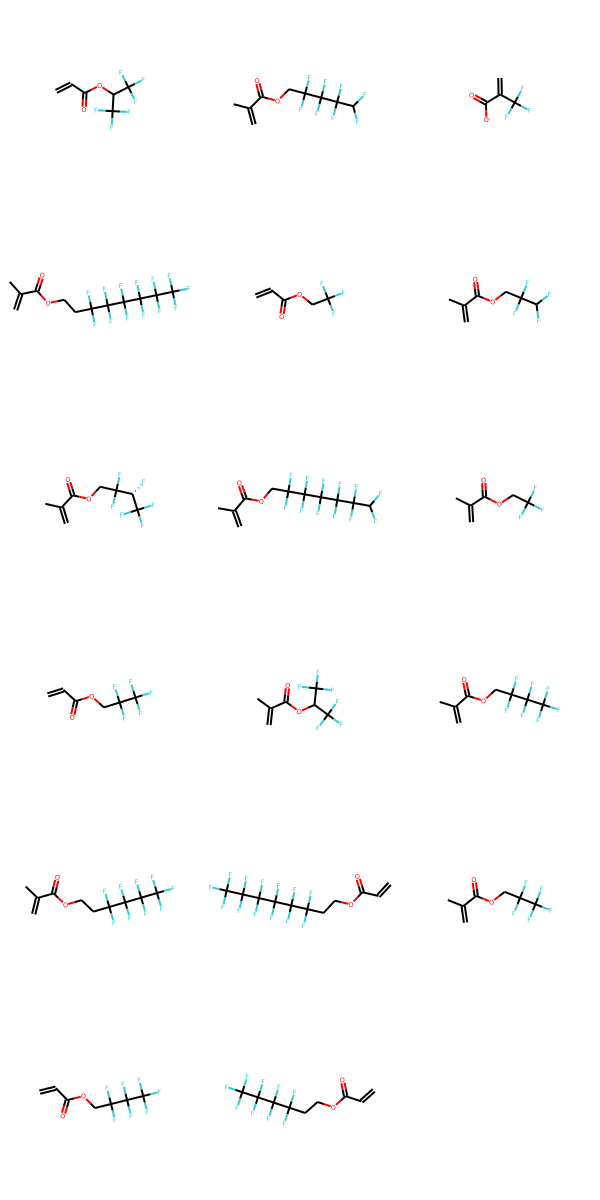

In [42]:
ms = [Chem.MolFromSmiles(s) for s in smiles_f if 'F' in s]
Draw.MolsToGridImage(ms, molsPerRow=3)

# feature visualization

In [1]:
from utils.data import DataGenerator

dg = DataGenerator(None, None)
dg = dg.load('../unscreened_dataset.fpoly.pkl')

  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


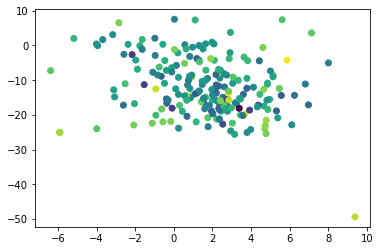

In [27]:
from sklearn.manifold import TSNE
import numpy as np

mol_feats = {}
for d in dg.data:
    for j, s in enumerate(d['smiles']):
        if s in mol_feats.keys(): continue
        f = d['mol'][j]
        mol_feats[s] = f

tsne = TSNE()
vecs = tsne.fit_transform(np.vstack([v for v in mol_feats.values()]))
mol_vecs = {k:v for k,v in zip(mol_feats.keys(), vecs)}

xs = []
ys = []
for d in dg.data:
    x = np.zeros(2)
    for s,w in zip(d['smiles'], d['weight']):
        x += mol_vecs[s] * w
    xs.append(x)
    ys.append(d['target'])
xs = np.vstack(xs)
ys = np.vstack(ys)


plt.scatter(xs[:,0], xs[:,1], c=ys)


In [19]:
from model.modules import *
from utils.trainer import MultipleTrainer

encoder = GraphEncoder({'n_atom_feat':1,'output_dim':1})
encoder.load('/home/jhyang/WORKSPACES/MODELS/fpoly/encoders/graph/V_wF_99k/cg_00','best',freeze=True)
decoder = DNN(input_dim=64, hidden_dims=[256, 256], output_dim=12)
model = Binder(encoder, decoder)
trainer = MultipleTrainer(model, opt=None, scaler=None)

In [23]:
for param in trainer.model.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [22]:
for param in trainer.model.parameters():
    param.requires_grad = True

In [38]:
encoder = encoder.cpu()
graph_embed = {}
for d in dg.data:
    smiles = d['smiles']
    feats = {
        'atom_feat':torch.tensor(d['atom']).cpu(),
        'bond_feat':torch.tensor(d['bond']).cpu(),
        'bond_idx':torch.tensor(d['edge']).cpu(),
        'graph_idx':torch.tensor(d['graph']).cpu(),
    }
    output = encoder(**feats)
    for s,e in zip(smiles, output.detach().numpy()):
        if s in graph_embed.keys(): continue
        graph_embed[s] = e
#encoder(dg.data[0]['atom'], dg.data[0]['edge'])

/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


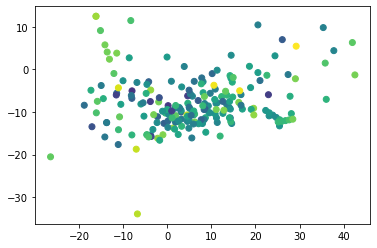

In [43]:
graph_embed


tsne = TSNE()
vecs = tsne.fit_transform(np.vstack([v for v in graph_embed.values()]))
graph_vecs = {k:v for k,v in zip(graph_embed.keys(), vecs)}

xs = []
ys = []
for d in dg.data:
    x = np.zeros(2)
    for s,w in zip(d['smiles'], d['weight']):
        x += graph_vecs[s] * w
    xs.append(x)
    ys.append(d['target'])
xs = np.vstack(xs)
ys = np.vstack(ys)


plt.scatter(xs[:,0], xs[:,1], c=ys)


In [16]:
import pandas as pd
import numpy as np
#df = pd.read_csv('dataset/qm9.csv')
df.columns
target_column = ['rc_a', 'rc_b', 'rc_c', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'R^2', 'zpve']
mask = [c in np.hstack(['id', target_column]) for c in df.columns]
hex(int(''.join(np.array(mask).astype(int).astype(str).tolist()), 2))



'0x107fe00'

In [18]:
' '.join(os.path.split('./dataset/qm9.csv'))

'./dataset qm9.csv'

In [21]:
hex(len(df.index))

'0x20afd'